 
## 1. Karthik GH - E22020


# Business problem 

Insurance is a product sold by insurance companies, which insures the customers stability by transferring loss risk over to the company. The challenge of the insurance companies however is the arbitrary nature of events that cause loss, and many times these losses cost a considerable amount. 

The fundamental goal of this project is to predict the expected claim amount which will be given to the policy holder based on data obtained from the comapny. We are asked to produce a pricing model to predict claim amount  of policy holders, and we are to be evaluated on the model performance using the MAPE.

MAPE = (1 / sample size) x ∑[( |actual - forecast| ) / |actual| ] x 100

# Need for this study

The scope of this project is to produce predictions for claim based on insurance data. 

The data was provided to us by Health Insurance Company.

The study of data will generate more insights


And to stablize the business through customer satisfaction, and to have a positive Return of Investment for the comapny.

# Data Appreciation


In [108]:
# Cleaning the data is done in data appreciation part. 

# importing the dependencies 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [109]:
# importing the dataset

df = pd.read_csv("C:\\Users\\SARANYA B\\Desktop\\PPP\\insurance_data.csv")
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [110]:
df.isnull().sum() # gives the missing value count per columns 

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [111]:
df["age"] = df["age"].fillna(df['age'].mean())
df['region'] = df['region'].fillna(df['region'].mode())

In [112]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [113]:
#df_new = df.fillna(method = "ffill")

In [114]:
#df_new.head()

In [115]:
df.dtypes

PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

In [116]:
#df_new.columns

In [117]:
#  Observation :  age and region were having null values in the data 
# to impute the null values we use  from sklearn.impute import SimpleImputer

In [118]:
#from sklearn.impute import SimpleImputer # from the sklearn library importing simple imputer
#imp = SimpleImputer(strategy="most_frequent")
#df1 = imp.fit_transform(df) # simple imputer converts df1 as numpy array  without null values 

In [119]:
#print(df1) # printing df1 

In [120]:
# Converting the Numpy array back to Dataframe and assigning the variabe as df_clean
#df_clean = pd.DataFrame(df1,columns=['PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic','children', 'smoker', 'region', 'claim'])

In [121]:
#df_clean.head()  # getting the first 5 rows of the dataset.

In [122]:
# checking for null values again 

#df_clean.isnull().sum() # There are no  missing values in the dataset.

# EDA

### Univariate Analysis

In [123]:
df.shape # Giving the Row and Column size 

(1340, 10)

In [124]:
df.describe() # finding the summary statistics for the numerical data.

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [125]:
df.describe(include = ["object"]) # finding the summary statistic for object data type.

,gender,diabetic,smoker,region
count,1340,1340,1340,1337
unique,2,2,2,4
top,male,No,No,southeast
freq,678,698,1066,443


# Data Visuvilization

### 1. Which area is having the highest Policy holders in percentage ?

In [23]:
# ploting pie-chart for regions to study the distribution on data across the regions.
Region_index = df.region.value_counts().index   # seperating the index of region and saving in Region_index
Region_index

Index(['southeast', 'northwest', 'southwest', 'northeast'], dtype='object')

In [24]:
Region_values = df.region.value_counts().values # seperating the values of region and saving in Region_values
Region_values

array([443, 349, 314, 231], dtype=int64)

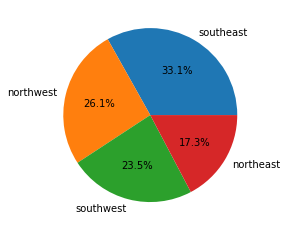

In [25]:
plt.pie(Region_values,labels = Region_index,autopct = "%1.1f%%") # ploting pie-chart on Region_index and Region_values.
plt.show() 

IN particular order Southeast has the maxium policy holders followed by Northwest,Southwest and Northeast

### 2. How many percentage of Smokers and Non-Smokers are there in the data ? and who ocupy more share in the data.

In [26]:
# plotting pie-chart to study the distribution of policyholders across smokers and non-smokers 

In [27]:
Smoker_index = df.smoker.value_counts().index # Seperating the index in the smokers data 
Smoker_index

Index(['No', 'Yes'], dtype='object')

In [28]:
Smoker_values = df.smoker.value_counts().values # Seperating the values of smokers and non-smokers in the data 
Smoker_values

array([1066,  274], dtype=int64)

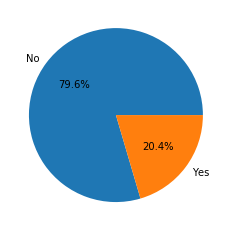

In [29]:
plt.pie(Smoker_values,labels = Smoker_index,autopct = "%1.1f%%")  # ploting the pie-chart for smokers and non-smokers % with 1 decimal point
plt.show()

About 80% of policyholders are Non-Smokers and 20 % of policyholders are smokers.

### 3. How many percentage of Diabetic and Non-Diabetic Policy holders are there in the data ? and who ocupy more share in the data.

In [30]:
# plotting pie-chart to study the distribution of policyholders having and not-having diabetic
Diab_index = df.diabetic.value_counts().index # Seperating the diabetic index from the data
Diab_index

Index(['No', 'Yes'], dtype='object')

In [31]:
Diab_val = df.diabetic.value_counts().values # Seperating the diabetic values  from the data
Diab_val

array([698, 642], dtype=int64)

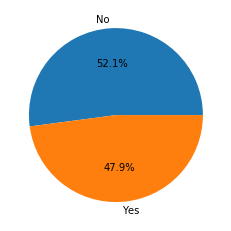

In [32]:
plt.pie(Diab_val, labels = Diab_index,autopct = "%1.1f%%") # ploting the pie-chart for the diabetic data with 1 decimal point.
plt.show()

About 52% policy holders are not diabetic and 48% of policyholders are diabetic this shows the data is equally distributed with Diabetic and Non Diabetic policy holders

### 4. How many percentage of Male and FemalePolicy holders are there in the data ? and who ocupy more share in the data.

In [33]:
# ploting pie-chart to find the gender distribution 
Gen_Index = df.gender.value_counts().index # Seperating the index for the gender
Gen_Index

Index(['male', 'female'], dtype='object')

In [34]:
Gen_val = df.gender.value_counts().values # Seperating the values for the gender 
Gen_val

array([678, 662], dtype=int64)

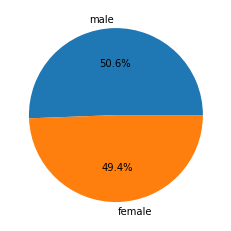

In [35]:
# Ploting the pie chart to visualize the gender data 
plt.pie(Gen_val,labels = Gen_Index, autopct = "%1.1f%%") # Plotting the distribution of the gender data in % with 1 decimal point
plt.show()

Male Policy holders are slightly more than the Female holders.

In [126]:
# Seperating the Features of int type and object type seperately 

df_numeric = df.select_dtypes(exclude = 'object') # excluding the object data type variables 
df_categ = df.select_dtypes(include = 'object') # including only the onject datatypes 

In [127]:
df_numeric.drop("PatientID", axis=1, inplace=True) # Droping the patient ID as this is an index column.

C:\Users\SARANYA B\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [128]:
df_numeric.head()

,age,bmi,bloodpressure,children,claim
0,39.000000,23.2,91,0,1121.87
1,24.000000,30.1,87,0,1131.51
2,38.078652,33.3,82,0,1135.94
3,38.078652,33.7,80,0,1136.40
4,38.078652,34.1,100,0,1137.01


In [129]:
df_categ.head() # first 5 rows of the categorical datas

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest


In [130]:
# for loop to plot box plots for all the numerical datas 

#for i in df_numeric:
#   if len(df_numeric[i].unique())>10: # Checking for 10 numerical continious numbers to decide as continoious data.
  #      sns.boxplot(x = df_numeric[i],color ='purple')# ploting the box plot
   #     plt.xlabel(i,fontsize=11)
    #    plt.title('Boxplot of Attribute ' +i, fontsize =11) # gives tle for the boxplots 
     #   plt.show()

In [131]:
#Observation: 
#1. Though we see a lot of outlayers in BMI,Bloodpressure and Claim , those are important variables and as of now no action #will be taken, untill we see more relation between them in bi-varient analysis.
#2. variable Age has no Outlayers, and its distribution is normal.

### Checking for the Skewness of the data.

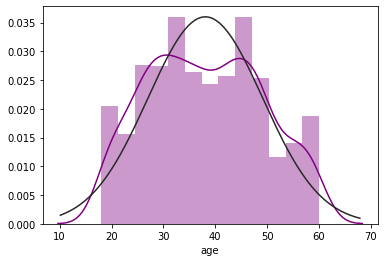

In [132]:
# AGE 
sns.distplot(df['age'],color='Purple',norm_hist=True,label="AGE",fit = norm)  # age data is asymmetrical left skewed

Probability distribution of age  is asymmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean

The Mean,Median,Mode will more or less in the same point. it can be seen in the describe() kernal. Where we can see that the mean and the median were around 38,

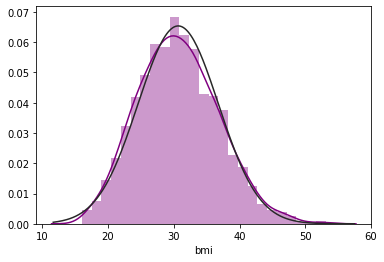

In [133]:
# BMI
sns.distplot(df['bmi'],color='Purple',norm_hist=True,label="BMI",fit = norm)# bmi  data is right skewed.

Probability distribution of BMI is asymmetrical, the data is RIGHT SKEWED, In a right skewed distribution, the mean is greater than the median.

It can be seen in the describe() kernal. Where we can see that the mean(30.66) is more than  median (30.4). 

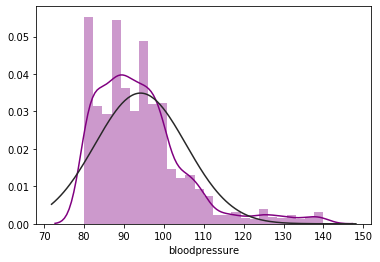

In [134]:
# BloodPressure
sns.distplot(df['bloodpressure'],color='Purple',norm_hist=True,label="Blood Pressure",fit = norm)# BP data is Right Skewed.

Probability distribution of BloodPressure is asymmetrical, the data is RIGHT SKEWED, In a right skewed distribution, the mean is greater than the median.

It can be seen in the describe() kernal. Where we can see that the mean(94.15) is more than  median (92).

We can observe that more policy holders are having high blood pressure so we get more outlayers which can be treated in feature engineering. 

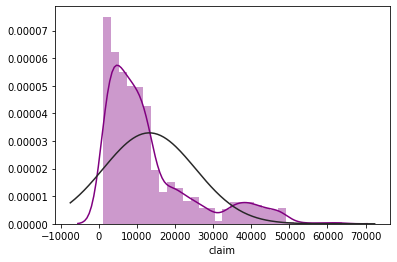

In [135]:
# Claim
sns.distplot(df['claim'],color='Purple',norm_hist=True,label="Claim",fit = norm) # Claim data is Right Skewed.

Probability distribution of Claim is asymmetrical, the data is RIGHT SKEWED, In a right skewed distribution, the mean is greater than the median.

It can be seen in the describe() kernal. Where we can see that the mean(13252.74) is more than  median (9369.61).

The policy holders having higher claim amount are less and having lower claim amount are more.

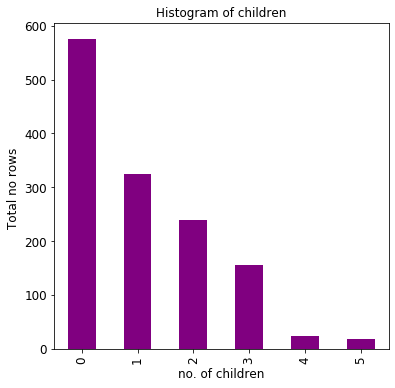

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [136]:
# Ploting the histogram for childrens.
# As Children comes under numeric discrete variable we plot Bar graph for the Children.
 
df["children"].value_counts().plot(kind = 'bar',grid=False,figsize=(6,6),color="purple",fontsize=12)
plt.xlabel("no. of children", fontsize = 12)
plt.ylabel("Total no rows ", fontsize = 12)
plt.title("Histogram of children", fontsize = 12)
plt.show()
df["children"].value_counts()

### How many childrens does the policy holders have in percentage?

In [137]:
# finding the percentage of Policy holders with respective children numbers.
x = pd.crosstab(df.children, columns ='count')  # using cross tab to calculate the count 
x

col_0,count
children,
0,576
1,324
2,240
3,157
4,25
5,18


In [138]:
n = len(df) # N is the length of variables 
round(x/n*100,2) # gettiing percentage of the policy holders.

col_0,count
children,
0,42.99
1,24.18
2,17.91
3,11.72
4,1.87
5,1.34


42.99 % of the policy holders were not having child, 24.18 % of the policy holders having 1 child, 17.91 % of Policy Holders are having 2 children and 11.72 % having 3 children and 1.87% and 1.34 % of policy holders having 4 and 5 childrens respectively.

This distribution has kurtosis PatientID       -1.200000
age             -0.939313
bmi             -0.060200
bloodpressure    2.890032
children         0.205463
claim            1.610246
dtype: float64


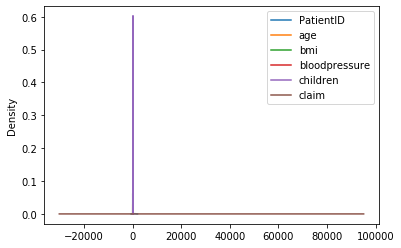

In [142]:
# Finding the Kurtosis of the data 
df.plot(kind = 'density')
print('This distribution has kurtosis', df.kurt())

Types of excess kurtosis

Leptokurtic or heavy-tailed distribution (kurtosis more than normal distribution).
Mesokurtic (kurtosis same as the normal distribution).
Platykurtic or short-tailed distribution (kurtosis less than normal distribution).

Observation : 
1. All the variables are platykurtic (kurtosis < 3)


Platykurtic having a lower tail and stretched around center tails means most of the data points are present in high proximity with mean. A platykurtic distribution is flatter (less peaked) when compared with the normal distribution.

2. As the values of Kurtosis increase there is more chance for the variable to have outlayers Bloodpressure and claim has maximum outlayer as the Kurtosis value is : 2.89
     

# Bi Variate Analysis. 

#### Checking for the Correlation in the data. 

In [50]:
df_numeric_new = (df_numeric-df_numeric.mean())/df_numeric.std() # Standardizing the numerical variables. 
df_numeric_new

,age,bmi,bloodpressure,children,claim
0,8.313786e-02,-1.223069,-0.276130,-0.907038,-1.001756
1,-1.270387e+00,-0.093168,-0.625942,-0.907038,-1.000960
2,6.411582e-16,0.430843,-1.063207,-0.907038,-1.000594
3,6.411582e-16,0.496345,-1.238113,-0.907038,-1.000556
4,6.411582e-16,0.561846,0.510947,-0.907038,-1.000506
...,...,...,...,...,...
1335,5.343129e-01,0.791101,-0.538489,-0.907038,3.458630
1336,1.887838e+00,1.216861,2.260008,-0.077392,3.742344
1337,-7.289771e-01,0.627347,-0.276130,1.581899,3.862111
1338,-9.733213e-02,-0.044042,1.035666,-0.907038,4.074460


###### In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related.

1. The Correlation is expressed in the form of a coefficient. Symbolized as r, a correlation coefficient is normally reported as a decimal number somewhere between +1.00 and -1.00

2. Positive, Negative and Zero Correlation:-

The positive and negative signs indicate positive and negative correlation respectively. Positive sign shows that with increase in one variable , the other increases as well, where the negative correlation indicates that with an increase in onethe other decreases 

The value itself provides the strength of relationship.

A perfect correlation of 1 or -1 indicates that the value of one variable can be determined exactly by knowing the value on the other variable. On the other hand, a correlation of 0 indicates no relationship between the two variables.Knowing the value of one of the variables provides no assistance in predicting the value on the second variable. 





In [51]:
df_numeric_new.corr(method="pearson") # finding the pearson correlation coefficient._new.corr(method="pearson") # finding the pearson correlation coefficient.

,age,bmi,bloodpressure,children,claim
age,1.000000,-0.041919,-0.060247,-0.025507,-0.027856
bmi,-0.041919,1.000000,0.143544,0.012092,0.197401
bloodpressure,-0.060247,0.143544,1.000000,-0.031682,0.531341
children,-0.025507,0.012092,-0.031682,1.000000,0.069233
claim,-0.027856,0.197401,0.531341,0.069233,1.000000


#### Observation 
Multicollinearity
1. Age vs BMI - Markedly Low and Negligible Negative Correlation 
2. Age vs BloodPressure - Markedly Low and Negligible Negative Correlation 
3. Age vs Children - Markedly Low and Negligible Negative Correlation 
4. BMI vs Bloodpressure - Very low positive Correlation *** 
5. BMI vs Children - Markedly Low and Negligible Positive Correlation 
6. Bloodpressure vs Children - Markedly Low and Negligible Negative Correlation 
Correlation
1. Age vs Claim - Markedly Low and Negligible Negative Correlation 
2. BMI vs Claim - Very low Positive Correlation *** 
3. Bloodpressure vs Claim - Moderate Positive Correlation ***
4. Children vs Claim - Markedly Low and Negligible Positive Correlation 


*** - Variables have low correlation



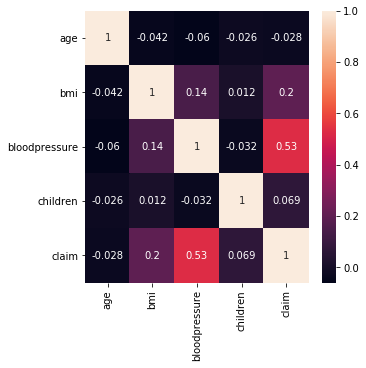

In [52]:
# Ploting Heatmap - ON Correlation.
plt.figure(figsize = (5,5))
sns.heatmap(df_numeric_new.corr(), annot=True)

### Ploting a pairplot 
###### The Seaborn Pairplot function allows the users to create an axis grid via which each numerical variable stored in data is shared across the X- and Y-axis in the structure of columns and rows. We can create the Scatter plots in order to display the pairwise relationships in addition to the distribution plot displaying the data distribution in the column diagonally.

C:\Users\SARANYA B\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


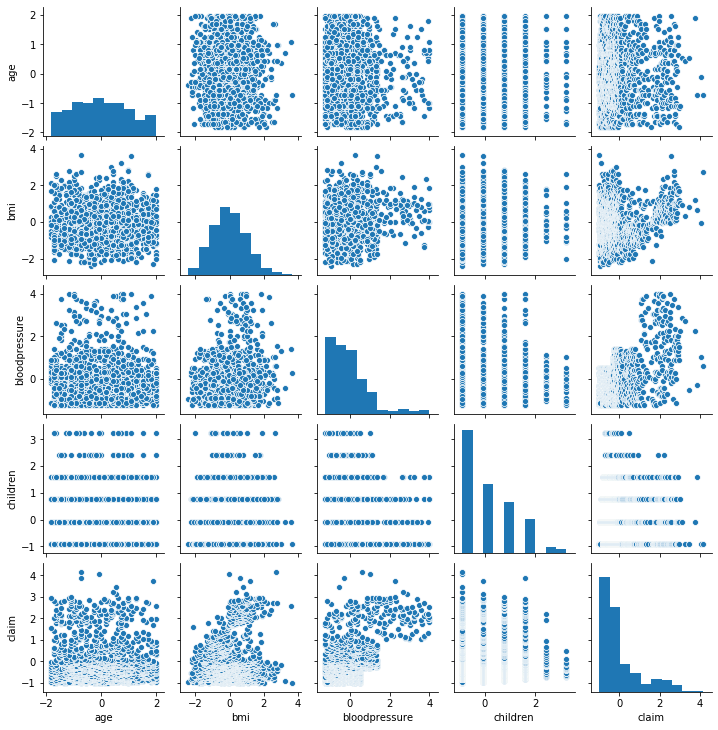

In [53]:
# By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. 
# The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
# A pictorial representation of the total numerical data.
sns.pairplot(df_numeric_new,diag_kind='hist',size = 2)

Explination:
We have then used the pairplot() function to visualize the plot with the diagonal_kind parameter set to the value 'hist'(Histogram). At last, we have used the Matplotlib show() function to display the plot to the users. As a result, the pair plot has been generated successfully.


#### What is the relation between the CLAIM and BMI, Visually

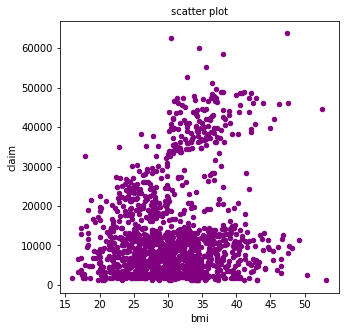

In [54]:
# To find the relation we plot the scatter plot between Claim and Bmi(two numeric variables)
#A scatter plot can be used either when one continuous variable is under the control of the experimenter and the
#other depends on it or when both continuous variables are independent. 
df_numeric.plot(kind='scatter',    # Scatter        
         x='bmi',y='claim',  # Assigning X and Y variyables    
         color='purple',     # color of the observations 
         figsize=(5,5))      # Figure Size
plt.xlabel("bmi",fontsize=10)  # X lable
plt.ylabel("claim",fontsize=10) # Y lable 
plt.title("scatter plot",fontsize=10) # Chart title
plt.show() # Display the chart 


###  Observation 
#Category	        BMI range - kg/m2
Severe Thinness	      < 16
Moderate Thinness	 16 - 17
Mild Thinness	     17 - 18.5
Normal	             18.5 - 25
Overweight	         25 - 30
Obese Class I	     30 - 35
Obese Class II	     35 - 40
Obese Class III	      > 40

1. Observations having Overweight and Obese Class I, are more and the claim amount for them are below 15000$
2. Less observations are there in the category above Obese Class III which is >40
3. It is observed that as BMI increases the claim amount is not Increasing.  
4. Even for higher BMI above 45 we have a single observation has a very higher claim amount. 
5. further analysis needed to come to a conclusion 

###  Relationship between Smoker and Claim

In [55]:
# Text Table for finding who has more claim.
df[["claim","smoker"]].groupby(["smoker"]).mean() # Grouping the claim and smoker on smoker.

,claim
smoker,
No,8421.121576
Yes,32050.231971


#### Observation 

1. People who smoke has more claim 

#### What reagion of people who have children have more claim ?

In [56]:
df[["children","region","claim"]].groupby(["region","children"]).mean() # Grouping children and region with claim on claim 

claim
region    children              
northeast 0         14876.094000
          1         20011.934035
          2         16556.019459
          3         19202.757200
          4         16139.195000
          5          9222.400000
northwest 0          9928.394870
          1         10009.605395
          2         13464.314394
          3         17786.160652
          4         11347.018333
          5          8965.800000
southeast 0         12765.575108
          1         12401.435263
          2         13998.489625
          3         14850.251020
          4         12802.718333
          5          9050.896250
southwest 0         12748.451250
          1         10515.919481
          2         17483.486316
          3         10402.442973
          4         14933.261429
          5          8444.158750

#### Obervation 
1. North East having highest claim with mothers having 1 child 

#### Observation with what number of childrens having higher claim ?

In [57]:
df[["claim","children"]].groupby(["children"]).mean()  # Grouping claim and children on children

,claim
children,
0,12327.993160
1,12731.171821
2,15073.564000
3,15355.318535
4,13850.656800
5,8786.035556


Observation
1. Observations with 3 children have more claim 15355.318535$

#### Which Gender has more claim ?

In [58]:
df[["claim","gender"]].groupby(["gender"]).mean() # Grouping Claim and Gender on Gender.

,claim
gender,
female,12569.578897
male,13919.790457


Male Gender has More Claim than Female Members.

#### Is Diabetic patients having more claim ?

In [59]:
df[["claim","diabetic"]].groupby(["diabetic"]).mean()

,claim
diabetic,
No,13354.031991
Yes,13142.624346


Observation 
1. NO, Non Diabetic patients have more claim.

#### Is People with high BMI and high Bloodpressure and who are  Smokers  having  diabetic or not ?

In [60]:
df[["bmi","smoker","diabetic"]].groupby(["diabetic","smoker"]).mean(), df[["bloodpressure","smoker","diabetic"]].groupby(["diabetic","smoker"]).mean()

(                       bmi
 diabetic smoker           
 No       No      30.813750
          Yes     31.176087
 Yes      No      30.484783
          Yes     30.243382,
                  bloodpressure
 diabetic smoker               
 No       No          91.864286
          Yes        104.166667
 Yes      No          91.588933
          Yes        103.000000)

Observation: 
1. Observations who smoke and having more bmi do not have diabetic.
2. Observations who smoke and having more high bloodpressure do not have diabetic.

#### Is there a huge difference between blood pressure of people who have diabetic and not?
#### Is there a huge difference between BMI of people who have diabetic and not?

In [61]:
bp = df[["bloodpressure","diabetic"]].groupby(["diabetic"]).mean() 


Observation:
No difference is found.

In [62]:
bm = df[["bmi","diabetic"]].groupby(["diabetic"]).mean()
bm

,bmi
diabetic,
No,30.885387
Yes,30.433645


Observation: 
No Difference found 

#### Is there a huge difference between bloodpressure of people who are smokers and non smokers?
#### Is there a huge difference between BMI of people who have smokers and non smokers?

In [63]:
df[["bmi","smoker"]].groupby(["smoker"]).mean()

,bmi
smoker,
No,30.657598
Yes,30.713139


Observation
There is no difference between bmi of smokers and non smokers.

In [64]:
df[["bloodpressure","smoker"]].groupby(["smoker"]).mean()

,bloodpressure
smoker,
No,91.733583
Yes,103.587591


Observation:
People who Smokes have higher bloodpressure.

### Checking the categorical variables with the claim 

##### Which region has low and high claim in the data 

In [65]:
df[["claim","region"]].groupby(["region"]).mean()

,claim
region,
northeast,16889.044719
northwest,11672.088453
southeast,13058.522664
southwest,12723.129841


Observation:
The Highest mean claim is recorded in NorthEast and least mean claim was recorded in NorthWest 

#### who has more claim and less claim in compring with smokers and non smokers 

In [66]:
df[["claim",'smoker']].groupby(["smoker"]).mean()

,claim
smoker,
No,8421.121576
Yes,32050.231971


Observation
1. The Mean of claim for smokers are more than the mean of claim for non smokers.

#### Who have more claim is people with diabetic or not?

In [67]:
df[["claim",'diabetic']].groupby(["diabetic"]).mean()

,claim
diabetic,
No,13354.031991
Yes,13142.624346


Observation
1. The Mean claim is more for people who do not have diabetic and Mean claim is less for people who have diabetic. 

#### Considering gender who has more claim Male or Female? 

In [68]:
df[["claim","gender"]].groupby(["gender"]).mean()

,claim
gender,
female,12569.578897
male,13919.790457


Observation
1. Gender Male is getting more mean claim amount than the Gender Female.

#### Which region people have high bloodpressure and are they smokers are not?

In [69]:
df[["bloodpressure","region","smoker"]].groupby(["region","smoker"]).mean()

bloodpressure
region    smoker               
northeast No          92.823171
          Yes        102.820896
northwest No          91.804124
          Yes         98.793103
southeast No          90.846591
          Yes        108.000000
southwest No          92.207031
          Yes        102.344828

Observation: 
The higher bloodpressure people are from Southeast region, who are smokers.

#### Which region people having high bloodpressure and they have diabetic or not?

In [70]:
df[["bloodpressure","region","diabetic"]].groupby(["region","diabetic"]).mean()

bloodpressure
region    diabetic               
northeast No            95.818182
          Yes           95.636364
northwest No            93.739583
          Yes           92.019108
southeast No            94.288889
          Yes           94.454128
southwest No            93.917647
          Yes           94.270833

Observation: 
The Highblood pressure people are from Northeast region and They do not have diabetic
    

## Initializing Variable Transformations and Treating the Outlayers in the data. 

In [71]:
# Reducing the claim value to plot it with other variables 
df['logclaim'] = np.log2(df['claim'])

In [72]:
df.logclaim # Reduced value of claim to bring down to scale with other variables. 

0       10.131690
1       10.144034
2       10.149671
3       10.150255
4       10.151029
          ...    
1335    15.750691
1336    15.837901
1337    15.873189
1338    15.933711
1339    15.960600
Name: logclaim, Length: 1340, dtype: float64

### Outlayer Treatment using Capping Method. 

In [73]:
# Creating a duplicate dataset to  perform the treatment.
df1 = df.drop('PatientID',axis =1)
df1.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,logclaim
0,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87,10.131690
1,24.000000,male,30.1,87,No,0,No,southeast,1131.51,10.144034
2,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94,10.149671
3,38.078652,male,33.7,80,No,0,No,northwest,1136.40,10.150255
4,38.078652,male,34.1,100,No,0,No,northwest,1137.01,10.151029


#### Which are the variables that has outlayers ? 

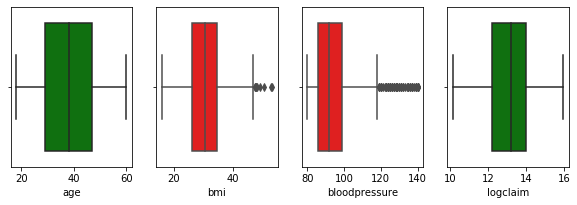

In [74]:
plt.figure(figsize= (10,10)) # giving input for the figure size which has to be plotted. 

plt.subplot(3,4,1) # 3 rows, 4 columns, 1st picture is given with the range (3,4,1).
sns.boxplot(df1['age'],color = 'Green',) # Variable to be plotted is Age.

plt.subplot(3,4,2)
sns.boxplot(df1['bmi'], color = 'red') # Variable to be plotted is BMI.

plt.subplot(3,4,3)
sns.boxplot(df1['bloodpressure'], color = 'red') # Variable to be plotted is Bloodpressure.

plt.subplot(3,4,4)
sns.boxplot(df1['logclaim'], color = 'Green') # Variable to be plotted is Claim which is of log form.

Observation:
1. Visualization shows variables with red are having outlayers i.e, Bmi and Bloodpressure 

#### Treating the variables using Relative Approach 
#### Standardization the variables to treat outlayers. Using (mu + 3 sigma) or (mu + 3 sigma)

In [75]:
# Checking outlier limit for BMI
outhigh_bmi = df1['bmi'].mean() + 3*df1['bmi'].std()
outlow_bmi = df1['bmi'].mean() - 3*df1['bmi'].std()
print("For BMI Upper Outlier Limit is : ", outhigh_bmi)
print("For BMI Lower Outlier Limit is : ", outlow_bmi)

For BMI Upper Outlier Limit is :  48.989159524406595
For BMI Lower Outlier Limit is :  12.34875092335458


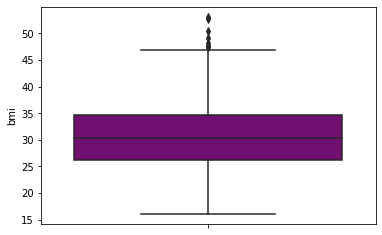

In [76]:
sns.boxplot(df1['bmi'],orient="v",color='purple') # Box Plot with outliers 

In [77]:
# Assigning the upper and lower limit to outliers for BMI
df1['bmi'] = np.where(df['bmi']>outhigh_bmi,outhigh_bmi,
             np.where(df['bmi']<outlow_bmi,outlow_bmi,df['bmi']))

In [78]:
# Checking outlier limit for Bloodpressure
outhigh_bp = df1['bloodpressure'].mean() + 3*df1['bloodpressure'].std()
outlow_bp = df1['bloodpressure'].mean() - 3*df1['bloodpressure'].std()
print("For Blood Pressure Upper Outlier Limit is : ", outhigh_bp)
print("For Blood Pressure Lower Outlier Limit is : ", outlow_bp)

For Blood Pressure Upper Outlier Limit is :  128.46159794111793
For Blood Pressure Lower Outlier Limit is :  59.85332743201637


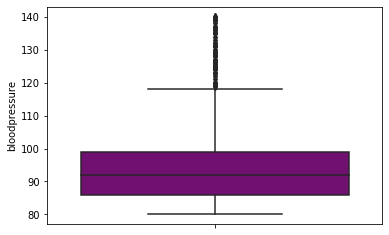

In [79]:
sns.boxplot(df1['bloodpressure'],orient="v",color='purple') # Box Plot with outliers 

In [80]:
# Assigning the upper and lower limit to outliers for Bloodpressure
df1['bloodpressure'] = np.where(df['bloodpressure']>outhigh_bp,outhigh_bp,
             np.where(df['bloodpressure']<outlow_bp,outlow_bp,df['bloodpressure']))

In [81]:
df.describe() # Shows the statistics of data before treating outliers.

,PatientID,age,bmi,bloodpressure,children,claim,logclaim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642,13.122596
std,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288,1.329673
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000,10.131690
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000,12.204475
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000,13.193773
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000,14.019267
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000,15.960600


In [82]:
# Capping Bmi and Bloodpressure - Relative Approach.
df1['bmi']=df['bmi'].clip(lower=df1['bmi'].quantile(0.05), upper=df1['bmi'].quantile(0.95))
df1['bloodpressure']=df['bloodpressure'].clip(lower=df1['bloodpressure'].quantile(0.05), upper=df1['bloodpressure'].quantile(0.95))

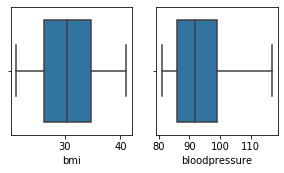

In [83]:
plt.figure(figsize= (10,8))

plt.subplot(3,4,2)
sns.boxplot(df1['bmi']) # Bmi without Outliers

plt.subplot(3,4,3)
sns.boxplot(df1['bloodpressure']) # Bloodpressure without Outliers

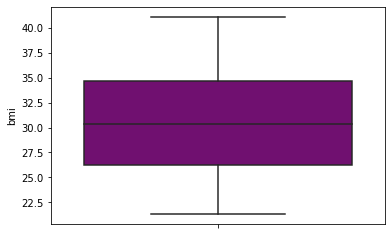

In [84]:
sns.boxplot(df1['bmi'],orient="v",
    color='purple') # Box Plot with out outliers 

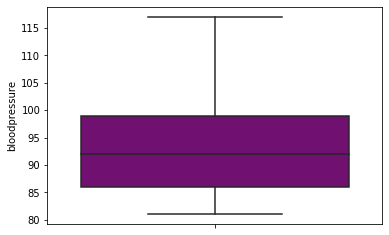

In [85]:
sns.boxplot(df1['bloodpressure'],orient="v",
    color='purple') # Box Plot with out outliers 

In [86]:
df1.describe() # Shows the Statistics of capped outliers.

,age,bmi,bloodpressure,children,claim,logclaim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,38.078652,30.618604,93.618657,1.093284,13252.745642,13.122596
std,11.082175,5.589876,9.659093,1.205334,12109.609288,1.329673
min,18.000000,21.290000,81.000000,0.000000,1121.870000,10.131690
25%,29.000000,26.275000,86.000000,0.000000,4719.685000,12.204475
50%,38.000000,30.400000,92.000000,1.000000,9369.615000,13.193773
75%,47.000000,34.700000,99.000000,2.000000,16604.305000,14.019267
max,60.000000,41.100000,117.000000,5.000000,63770.430000,15.960600


#####  Checking for VIF - Variance Inflation Factors (VIFs) measure the correlation among independent variables this type of correlation is called as multicollinearity. Excessive multicollinearity can cause problems for models.

In [87]:
# Importing the statsmodel for Variable inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Multicollinearity can gave the following impact on the model:
    # The Standard error of estimate is inflated 
    # A statistically significant explanatory variable may be labelled as statistically insignificant due to 
        # high p-value, this is because when the standard error of estimate is inflated, 
        # it results in an underestimation of t-statistic value
    # The Sign of the regression coefficient may be differnet that is insted of negative value for regression coefficient, we may have a positive regression coefficient and vice versa
    # Adding/removing a variable or even an observation may result in large variation in regression coefficient estimates.
    
        

### Step 1: 

In [89]:
X = df1[['bmi', 'bloodpressure','age','children','claim']]  # Assigning a subdata frame to Variable name X
vif_df1 = pd.DataFrame() # Creating a dataframe for VIF
vif_df1["feature"] = X.columns # Inserting the Variable X into dataframe 
  
vif_df1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))] # Calculating VIF for both the feature 
  
print(vif_df1) # Multicolinearity exist 

         feature        VIF
0            bmi  27.262308
1  bloodpressure  36.516075
2            age  11.344605
3       children   1.808311
4          claim   2.517255


In [90]:
df2 = df1.drop("bloodpressure", axis = True ) # Droping the Bloodpressure 

In [91]:
X = df2[['bmi','age','children','claim']]  # Assigning a subdata frame to Variable name X
vif_df2 = pd.DataFrame() # Creating a dataframe for VIF
vif_df2["feature"] = X.columns # Inserting the Variable X into dataframe 
  
vif_df2["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))] # Calculating VIF for both the feature 
  
print(vif_df2) # Multicolinearity exist 

    feature        VIF
0       bmi  10.745865
1       age   8.989968
2  children   1.797029
3     claim   2.302186


In [92]:
df3 = df2.drop("bmi", axis = True) # Droping the BMI 

In [93]:
X = df3[['age','children','claim']]  # Assigning a subdata frame to Variable name X
vif_df3 = pd.DataFrame() # Creating a dataframe for VIF
vif_df3["feature"] = X.columns # Inserting the Variable X into dataframe 
  
vif_df3["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))] # Calculating VIF for both the feature 
  
print(vif_df3) # Multicolinearity exist

    feature       VIF
0       age  2.463406
1  children  1.731122
2     claim  2.024937


#### Converting Categorical Variables to Numeric variables to fit in the Model

In [94]:
df3_new =  pd.get_dummies(df3, columns = ['gender','diabetic','smoker','region']) # Getting the dummies for categorical data 

In [95]:
df3_new.head()  # Shows the first 5 rows of the data set 

,age,children,claim,logclaim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.000000,0,1121.87,10.131690,0,1,0,1,1,0,0,0,1,0
1,24.000000,0,1131.51,10.144034,0,1,1,0,1,0,0,0,1,0
2,38.078652,0,1135.94,10.149671,0,1,0,1,1,0,0,0,1,0
3,38.078652,0,1136.40,10.150255,0,1,1,0,1,0,0,1,0,0
4,38.078652,0,1137.01,10.151029,0,1,1,0,1,0,0,1,0,0


In [99]:
# Seperating the independent and dependent variables 
X = df3_new.drop(['claim'], axis = 1 ) # All X's values 
y = df3_new.claim # y - values 

In [100]:
X.head() # display  first 5 rows in the X dataset 

,age,children,logclaim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.000000,0,10.131690,0,1,0,1,1,0,0,0,1,0
1,24.000000,0,10.144034,0,1,1,0,1,0,0,0,1,0
2,38.078652,0,10.149671,0,1,0,1,1,0,0,0,1,0
3,38.078652,0,10.150255,0,1,1,0,1,0,0,1,0,0
4,38.078652,0,10.151029,0,1,1,0,1,0,0,1,0,0


In [101]:
y.head() # Displays first 5 rows in the y 

0    1121.87
1    1131.51
2    1135.94
3    1136.40
4    1137.01
Name: claim, dtype: float64

In [102]:
from sklearn.preprocessing import StandardScaler # importing the standardscalar from sklearn library for standardizing the data 

scalar = StandardScaler() # taking the model into variable name scalar 
X_Scaled = scalar.fit_transform(X) # fitting the model 
X_Scaled #displays the scaled values 

array([[ 8.31689020e-02, -9.07376479e-01, -2.25019526e+00, ...,
        -5.93438730e-01,  1.42296546e+00, -5.53211429e-01],
       [-1.27086139e+00, -9.07376479e-01, -2.24090844e+00, ...,
        -5.93438730e-01,  1.42296546e+00, -5.53211429e-01],
       [ 6.41397593e-16, -9.07376479e-01, -2.23666724e+00, ...,
        -5.93438730e-01,  1.42296546e+00, -5.53211429e-01],
       ...,
       [-7.29249274e-01,  1.58248935e+00,  2.06939644e+00, ...,
         1.68509393e+00, -7.02757747e-01, -5.53211429e-01],
       [-9.73684706e-02, -9.07376479e-01,  2.11492941e+00, ...,
        -5.93438730e-01,  1.42296546e+00, -5.53211429e-01],
       [-7.29249274e-01, -9.07376479e-01,  2.13515944e+00, ...,
        -5.93438730e-01,  1.42296546e+00, -5.53211429e-01]])

In [103]:
from sklearn.model_selection import train_test_split # tranin and test split for the data. 

X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size = 0.2, random_state = 123) # in test we take 80% for train data and 20 % for test data. 

In [104]:
from sklearn.linear_model import LinearRegression  #Importing the LR model from sklearn library

lin_reg = LinearRegression() # taking the model in the variable 
lin_reg.fit(X_train,y_train) # fitting the model 
y_pred = lin_reg.predict(X_test) # Predicting the yhat 
y_pred


array([10716.14835012,  8823.10339255, -6364.66263847,  6102.2963624 ,
        4734.90432814, 32586.76703732, 12105.26385224, 14808.41733267,
       17964.46204351, 32943.73750513,  1698.33662655, 10317.26800204,
       18229.64178374, 14159.95702238, 35720.75700554, 12759.08039133,
       -3693.14043212, 13537.71594303, 19109.60179292, -3717.14883113,
         491.32377778, 14183.66971861, 31505.5565973 ,  9952.17527158,
        -114.17379238, 34990.00007098, 33534.38120275, 10475.96587238,
       21156.80347706, -3861.03280811, 22254.97893393,  1636.39084418,
       14591.12873929, 11299.15986539,  8836.25837203,   930.61592763,
       27445.10350721,  5154.68915263, 10629.14926642, 22567.44822237,
       13228.54907986, 14422.43480493, 33475.43296509, 13181.25529958,
        2346.08491335, 39968.07794698, 14842.31863909,  5699.72112253,
       10965.314088  , 35968.06909611,  8193.76762088, 12664.83330742,
        5158.8688425 , -3781.81415887,  1127.5079023 , 15652.6725072 ,
      

In [105]:
# MAPE
np.mean(np.abs(y_test - y_pred)/y_test)*100

54.48395381294719

### Observation : 
#### MAPE is a straightforward metric, meaning a 54.48% MAPE represents the average deviation between the forecasted value and actual values was 54.48%, regardless of whether the deviation was positive or negative.